# Airline Passenger Satisfaction - Veri Analizi Projesi

Bu projede havayolu yolcu memnuniyet verileri analiz edilmiştir. Aşağıdaki adımlar uygulanmıştır:

1. Veri Setinin İncelenmesi
2. İstatistiksel Özet
3. Eksik Değer Analizi
4. Aykırı Değer Analizi
5. Görselleştirme

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


## 1. Veri Setini Yükleme ve İlk İnceleme

In [5]:
df_airline = pd.read_csv("train_airline.csv")
df_airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 2. İstatistiksel Özet

In [ ]:
# Burada describe fonksiyonu kolonlarda yazan değerlerin genel ortalama, standart sapma,
# minimum-maximum değerleri ve verinin %25 ve %75 in altında kaldığı değer ve 
# %50 yani ortanca değer (medyan) gibi ölçümlerin tablo halinde verilmesini sağlar.

In [19]:
df_airline.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# Select dtypes ile object tipi sütunların yani string/kategorik veri içeren sütunların istatiksel özetini sunar. Örneğin cinsiyet, yolcu sınıfı ve memnuniyet gibi.
# Count: boş olmayan veri sayısı, Unique: Kaç benzersiz değerin olduğu, Top: En sık görülen değer (mod), Frequency: en sık görülen değerin tekrar sayısı gibi bilgileri sunar. 

In [20]:
df_airline.select_dtypes(include='object').describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [ ]:
# Yolculardan Kadınlar ve Erkeklerin yaş ortalamaları

In [22]:
men_age_avg = df_airline[df_airline["Gender"] == "Male"]["Age"].mean()
women_age_avg = df_airline[df_airline["Gender"] == "Female"]["Age"].mean()

print(f'Erkek yolcuların yaş ortalaması: {men_age_avg:.2f}')
print(f'Kadın yolcuların yaş ortalaması: {women_age_avg:.2f}')

Erkek yolcuların yaş ortalaması: 39.52
Kadın yolcuların yaş ortalaması: 39.25


In [ ]:
# Reşit olmayan yolcuların sayısı, yaş ortalaması ve yaşları medyanı
# Toplam sayıları hesaplarken len() yerine count() kullanmayı tercih ettim çünkü count boş olmayan verileri sayar len ise boş verileri de sayar.

In [32]:
under_18_years_count = df_airline[df_airline["Age"] < 18]["Age"].count()
under_18_years_age_mean = df_airline[df_airline["Age"] < 18]["Age"].mean()
under_18_years_age_median = df_airline[df_airline["Age"] < 18]["Age"].median()

print(f"18 yaşından küçük yolcu sayısı: {under_18_years_count}")
print(f"18 yaşından küçüklerin yaş ortalaması: {under_18_years_age_mean:.2f}")
print(f"18 yaşından küçüklerin yaşları medyanı: {under_18_years_age_median:.2f}")

18 yaşından küçük yolcu sayısı: 7931
18 yaşından küçüklerin yaş ortalaması: 12.44
18 yaşından küçüklerin yaşları medyanı: 13.00


In [ ]:
# Yolculuktan ve hizmetten memnun kalan yolcuların sayısı ve yüzdelik oranı

In [43]:
satisfied_passengers = df_airline[df_airline["satisfaction"] == "satisfied"]["satisfaction"].count()

total_passengers = len(df_airline)

# Yüzde hesaplam
satisfaction_rate = (satisfied_passengers / total_passengers) * 100

print(f"Memnun yolcu sayısı: {satisfied_passengers}")
print(f"Toplam yolcu sayısı: {total_passengers}")
print(f"Memnuniyet oranı: %{satisfaction_rate:.2f}")

Memnun yolcu sayısı: 45025
Toplam yolcu sayısı: 103904
Memnuniyet oranı: %43.33


In [ ]:
# Memnun kalmayan yada nötr olan yolcuların sayısı ve yüzdelik oranı

In [45]:
neutral_or_dissatisfied_passengers = df_airline[df_airline["satisfaction"] == "neutral or dissatisfied"]["satisfaction"].count()

total_passengers = len(df_airline)

# Yüzde hesaplam
satisfaction_rate = (neutral_or_dissatisfied_passengers / total_passengers) * 100

print(f"Memnun olmayan yada nötr olan yolcu sayısı: {neutral_or_dissatisfied_passengers}")
print(f"Toplam yolcu sayısı: {total_passengers}")
print(f"Memnun olmama oranı: %{satisfaction_rate:.2f}")

Memnun olmayan yada nötr olan yolcu sayısı: 58879
Toplam yolcu sayısı: 103904
Memnun olmama oranı: %56.67


In [ ]:
# Memnun kalan ve memnun kalmayan erkeklerin ve kadınların oranları

In [50]:
men = df_airline[df_airline["Gender"] == "Male"]["Gender"].count()
women = df_airline[df_airline["Gender"] == "Female"]["Gender"].count()

satisfied_men = df_airline[(df_airline["Gender"] == "Male") & (df_airline["satisfaction"] == "satisfied")]["satisfaction"].count()
satisfied_women = df_airline[(df_airline["Gender"] == "Female") & (df_airline["satisfaction"] == "satisfied")]["satisfaction"].count()

dissatisfied_men = df_airline[(df_airline["Gender"] == "Male") & (df_airline["satisfaction"] == "neutral or dissatisfied")]["satisfaction"].count()
dissatisfied_women = df_airline[(df_airline["Gender"] == "Female") & (df_airline["satisfaction"] == "neutral or dissatisfied")]["satisfaction"].count()


# Yüzde hesaplama
satisfied_men_rate = ( satisfied_men / men ) * 100
satisfied_women_rate = ( satisfied_women / women ) * 100

dissatisfied_men_rate = ( dissatisfied_men / men ) * 100
dissatisfied_women_rate = ( dissatisfied_women / women ) * 100


print(f"Memnun olan erkeklerin oranı: {satisfied_men_rate:.2f}")
print(f"Memnun olan kadınların oranı: {satisfied_women_rate:.2f}\n")

print(f"Memnun kalmayan erkeklerin oranı: {dissatisfied_men_rate:.2f}")
print(f"Memnun kalmayan kadınların oranı: {dissatisfied_women_rate:.2f}")

Memnun olan erkeklerin oranı: 43.95
Memnun olan kadınların oranı: 42.74

Memnun kalmayan erkeklerin oranı: 56.05
Memnun kalmayan kadınların oranı: 57.26


In [ ]:
# Yolcuların hangi konularda memnun kalmadığının analizi

In [61]:
dissatisfied = df_airline[df_airline['satisfaction'] == 'neutral or dissatisfied']

#hizmet kolonlarını listeliyoruz
service_columns = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"]

low_scores = dissatisfied[service_columns].mean().sort_values()


# Series → DataFrame çevir ve sütun adı ver
low_scores_df = low_scores.reset_index()
low_scores_df.columns = ['Hizmet Türü', 'Ortalama Puan']

print(low_scores_df)

                          Hizmet Türü  Ortalama Puan
0               Inflight wifi service       2.399633
1              Ease of Online booking       2.546850
2                     Online boarding       2.656125
3              Inflight entertainment       2.894156
4                         Cleanliness       2.936123
5                      Food and drink       2.958050
6                       Gate location       2.976121
7                    Leg room service       2.990812
8                    On-board service       3.019158
9                        Seat comfort       3.036295
10                    Checkin service       3.042952
11  Departure/Arrival time convenient       3.129112
12                   Baggage handling       3.375991
13                   Inflight service       3.388814


In [ ]:
# Yaş grubuna göre memnuniyet dağılımı

In [67]:
df_airline['AgeGroup'] = pd.cut(                        # pd.cut Sayısal bir veriyi aralıklara (bin) ayırır ve her veriyi uygun gruba atar.
    df_airline['Age'],                                  # bu işlemi age kolonundaki değerlere uygulayacağız.
    bins=[0, 18, 30, 45, 60, 100],                      # aralıkları belirliyoruz.
    labels=['0-18', '19-30', '31-45', '46-60', '60+']   # bu aralıklara verilecek etiketler.
)

age_satisfaction = pd.crosstab(     # Bu fonksiyon, iki sütunun kesişim sıklıklarını hesaplar.
    df_airline['AgeGroup'],
    df_airline['satisfaction'],
    normalize='index'               # Satır bazında normalleştir → her satırın toplamı 1 (veya %100) olacak şekilde oranla. Böylece her yaş grubunda memnun olanların oranı doğrudan çıkar.
) * 100                             # Oranları %’ye çevirmek için 100 ile çarpıyoruz.

# Değer yuvarlanır
age_satisfaction = age_satisfaction.round(2)

print(age_satisfaction)

satisfaction  neutral or dissatisfied  satisfied
AgeGroup                                        
0-18                            82.73      17.27
19-30                           64.59      35.41
31-45                           51.27      48.73
46-60                           42.59      57.41
60+                             79.16      20.84


In [ ]:
# Uçuş sınıfına göre memnuniyet durumu

In [9]:
# Crosstab iki veya daha fazla kategorik değişkenin birbirine göre sıklıklarını (frekanslarını) gösteren çapraz tablo (contingency table) oluşturur.
class_satisfaction_counts = pd.crosstab(df_airline['Class'], df_airline['satisfaction'])
print(class_satisfaction_counts)

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        15185      34480
Eco                             38044       8701
Eco Plus                         5650       1844


In [7]:
class_satisfaction_percent = pd.crosstab(
    df_airline['Class'],
    df_airline['satisfaction'],
    normalize='index'
) * 100

print(class_satisfaction_percent.round(2))


satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        30.57      69.43
Eco                             81.39      18.61
Eco Plus                        75.39      24.61


## 3. Eksik Değer Analizi

In [ ]:
# Veri setimizde varış gecikmesi süresi dakika cinsinden girilmiştir.
# Ancak eksik değer analizi sonucu görüyoruz ki 310 yolcu için bu alan boş bırakılmış , değer girilmemiştir.
# Bu, veri setindeki toplam satırların %0.29 una denk gelmektedir.
# Bu oran %1 in çok altında olduğu için veri setindeki bu alan temiz kabul edilebilir.
# Bu seviyedeki düşük eksiklik için uygulanabilecek yaygın yaklaşımlar şunlar olabilir: 
# Eksik satırların silinmesi " df_airline.dropna(subset=['Arrival Delay in Minutes'], inplace=True) "
# Ancak buradaki eksik olan satırın tamamı değil sadece bir alanın verisi. Bu sebeple silmek durumda değiliz.
# Eksik alanları ortalama yada medyan gibi tipik değerlerle doldurmak:
# df_airline['Arrival Delay in Minutes'].fillna(df_airline['Arrival Delay in Minutes'].mean(), inplace=True)
# df_airline['Arrival Delay in Minutes'].fillna(df_airline['Arrival Delay in Minutes'].median(), inplace=True)

In [36]:
missing = df_airline.isnull().sum()
missing_percent = (missing / len(df_airline)) * 100
missing_df = pd.DataFrame({'Eksik Sayısı': missing, 'Yüzde (%)': missing_percent})
missing_df[missing_df['Eksik Sayısı'] > 0]

,Eksik Sayısı,Yüzde (%)
Arrival Delay in Minutes,310,0.298352


## 4. Aykırı Değer Analizi

In [29]:
z_scores = np.abs(stats.zscore(df_airline.select_dtypes(include=np.number)))
outliers = (z_scores > 3)
outlier_counts = np.sum(outliers, axis=0)
outlier_counts

Unnamed: 0                              0
id                                      0
Age                                    17
Flight Distance                        58
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        3
Cleanliness                             0
Departure Delay in Minutes           2222
Arrival Delay in Minutes                0
dtype: int64

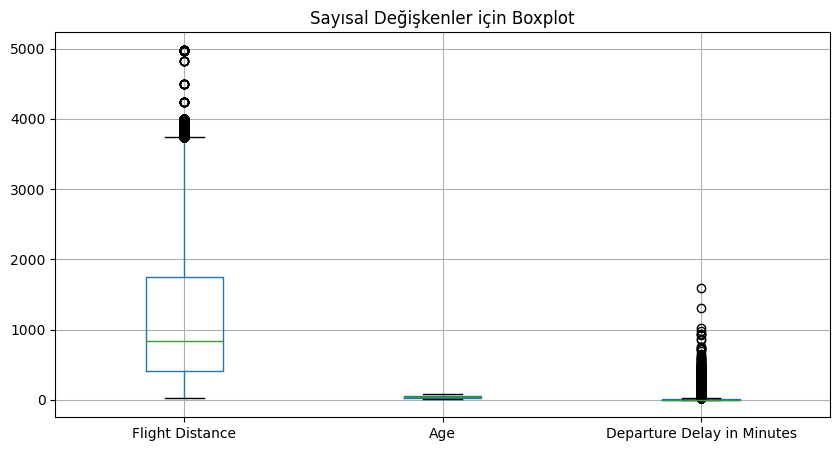

In [68]:
df_airline.boxplot(column=['Flight Distance', 'Age','Departure Delay in Minutes'], figsize=(10, 5))
plt.title("Sayısal Değişkenler için Boxplot")
plt.show()

In [ ]:
# Bazı yolcular çok yaşlı ve bu durum genel dağılımdan sapıyor olabilir. Ancak bu değerler uç ama gerçekçi, silinmesi gerekmez.
# Bazı yolcular çok uzun mesafeli uçuşlar yapmış. Bu durum modelleme sırasında aşırı etkili olabilir, çünkü uçuş süresi memnuniyeti doğrudan etkileyebilir.
# Çoğu uçuş zamanında veya hafif gecikmeli iken, bazı uçuşlar aşırı gecikmeli. Bu aykırı değerler, memnuniyetsizliği ciddi şekilde açıklayabilir. Bu yüzden veri dışına atmak yerine, ayrı analizlerde öne çıkarılabilir.

In [72]:
# İlgili sütunları al
columns_of_interest = ['Age', 'Flight Distance', 'Departure Delay in Minutes']
selected = df_airline[columns_of_interest]

# Z-score hesapla. Bir değerin ortalamadan ne kadar uzaklaştığını gösterir, standart sapma cinsinden. Mesela yaş 70, ortalama yaş 40, std sapma 10  ise (70-40)/10 = 3 , yani bu kişinin yaşı ortalamadan 3 standart sapma kadar uzak.
z_scores = np.abs(stats.zscore(selected))

# Aykırı değer maskesi (3 sütunda en az bir tanesi z-score > 3 ise). Genel dağılımın dışına çıkmış bir değer büyük olasılıkla aykırı (outlier) kabul edilir.
outlier_mask = (z_scores > 3).any(axis=1)

# Aykırı değer içeren satırları göster
outlier_rows = df_airline.loc[outlier_mask, columns_of_interest]

outlier_rows.head()

,Age,Flight Distance,Departure Delay in Minutes
168,49,578,162
178,42,1372,141
278,40,1959,209
282,26,406,149
340,25,1796,176


## 5. Görselleştirme

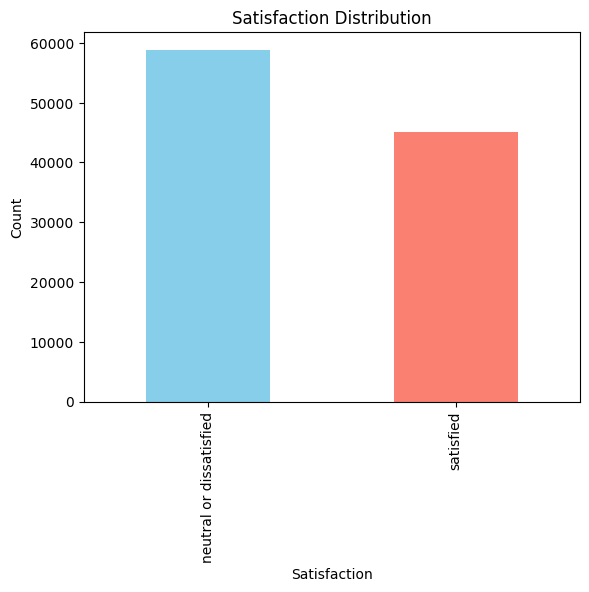

In [54]:
df_airline['satisfaction'].value_counts().plot(kind='bar', title="Satisfaction Distribution", color=['skyblue', 'salmon'])
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

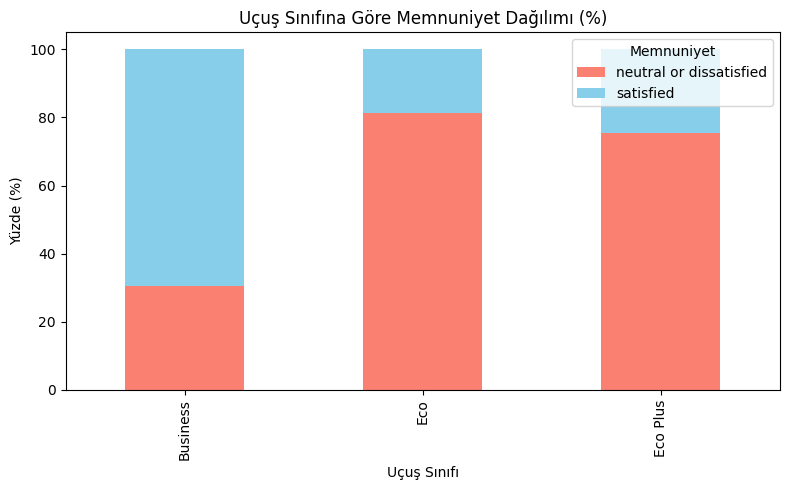

In [8]:
class_satisfaction_percent.plot(
    kind='bar',
    stacked=True,
    color=['salmon', 'skyblue'],
    figsize=(8, 5)
)

plt.title("Uçuş Sınıfına Göre Memnuniyet Dağılımı (%)")
plt.xlabel("Uçuş Sınıfı")
plt.ylabel("Yüzde (%)")
plt.legend(title="Memnuniyet")
plt.tight_layout()
plt.show()

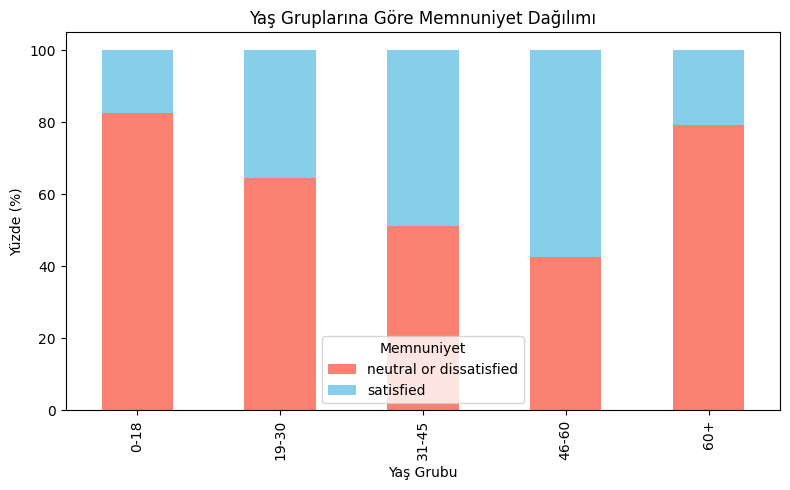

In [64]:
# Bar grafiği ile memnuniyet yüzdeleri
age_satisfaction.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 5))

plt.title("Yaş Gruplarına Göre Memnuniyet Dağılımı")
plt.xlabel("Yaş Grubu")
plt.ylabel("Yüzde (%)")
plt.legend(title="Memnuniyet")
plt.tight_layout()
plt.show()

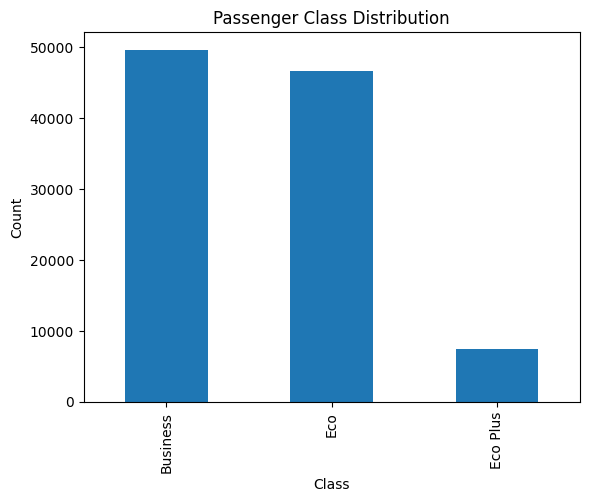

In [53]:
df_airline['Class'].value_counts().plot(kind='bar', title="Passenger Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

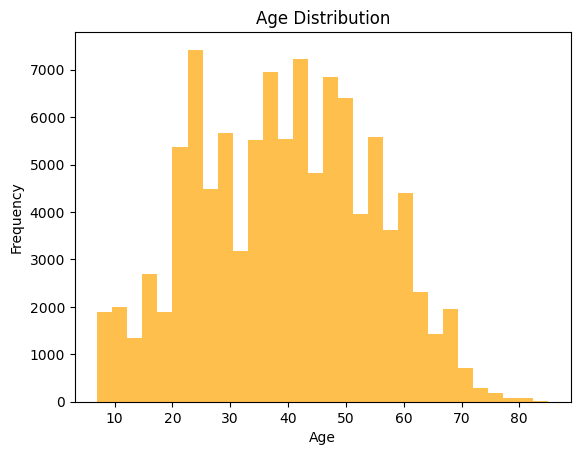

In [52]:
df_airline['Age'].plot(kind='hist', bins=30, alpha=0.7, color='orange', title="Age Distribution")
plt.xlabel("Age")
plt.show()

In [ ]:
# Correlation Matrix : Sütunlar arasındaki ilişkiyi ölçer. Bu iki değişken birbirine nasıl ve ne kadar bağlı?
# Koyu mavi : pazitif ilişki
# Koyu kırmızı : negatif ilişki
# açık renkler : zayıf ilişki
# Hücrelerdeki sayılar iki değişkenin korelasyon katsayısıdır.

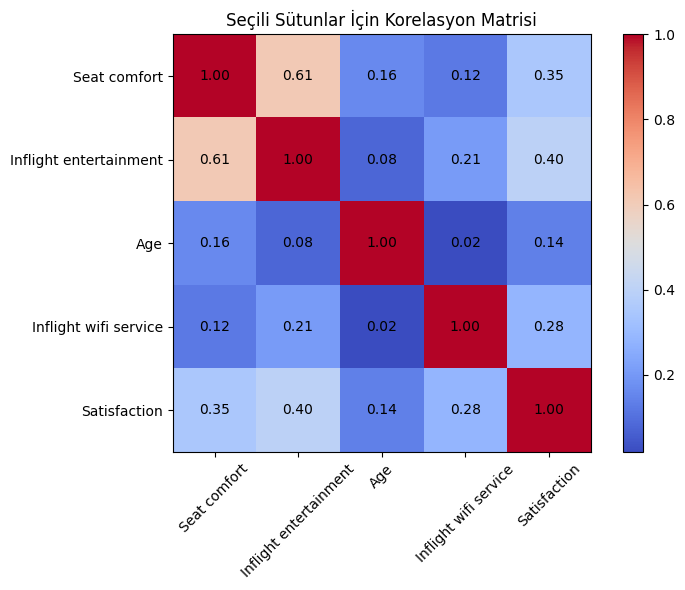

In [83]:
# 'Satisfaction' sütunu string olduğu için 0 - 1 değerlerine çeviriyoruz.
df_airline['Satisfaction'] = df_airline['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

columns_of_interest = ['Seat comfort','Inflight entertainment', 'Age', 'Inflight wifi service', 'Satisfaction']
corr_matrix = df_airline[columns_of_interest].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Etiketler
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)

# Değerleri hücrelere yaz
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        value = corr_matrix.iloc[j, i]
        plt.text(i, j, f"{value:.2f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Seçili Sütunlar İçin Korelasyon Matrisi")
plt.tight_layout()
plt.show()